# Imports

In [1]:
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sys.path.insert(1, '/kaggle/input/studentt')
from util import *

## **About Dataset**

This dataset contains comprehensive information on **2,392 high school students**, detailing their **demographics**, **study habits**, **parental involvement**, **extracurricular activities**, and **academic performance**. The target variable, **GradeClass**, classifies students' grades into distinct categories, providing a robust dataset for **educational research**, **predictive modeling**, and **statistical analysis**.


## **Student Information**
### **Student ID**
**StudentID**: A unique identifier assigned to each student (1001 to 3392).

### **Demographic Details**
- **Age**: The age of the students ranges from 15 to 18 years.
- **Gender**: Gender of the students, where `0` represents **Male** and `1` represents **Female**.
- **Ethnicity**: The ethnicity of the students, coded as follows:
    - `0`: **Caucasian**
    - `1`: **African American**
    - `2`: **Asian**
    - `3`: **Other**
- **ParentalEducation**: The education level of the parents, coded as follows:
    - `0`: **None**
    - `1`: **High School**
    - `2`: **Some College**
    - `3`: **Bachelor's**
    - `4`: **Higher**

## **Study Habits**
- **StudyTimeWeekly**: Weekly study time in hours, ranging from 0 to 20.
- **Absences**: Number of absences during the school year, ranging from 0 to 30.
- **Tutoring**: Tutoring status, where `0` indicates **No** and `1` indicates **Yes**.

## **Parental Involvement**
- **ParentalSupport**: The level of parental support, coded as follows:
    - `0`: **None**
    - `1`: **Low**
    - `2`: **Moderate**
    - `3`: **High**
    - `4`: **Very High**

## **Extracurricular Activities**
- **Extracurricular**: Participation in extracurricular activities, where `0` indicates **No** and `1` indicates **Yes**.
- **Sports**: Participation in sports, where `0` indicates **No** and `1` indicates **Yes**.
- **Music**: Participation in music activities, where `0` indicates **No** and `1` indicates **Yes**.
- **Volunteering**: Participation in volunteering, where `0` indicates **No** and `1` indicates **Yes**.

## **Academic Performance**
- **GPA**: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.

## **Target Variable: Grade Class**
**GradeClass**: Classification of students' grades based on GPA:
- `0`: **'A'** (GPA >= 3.5)
- `1`: **'B'** (3.0 <= GPA < 3.5)
- `2`: **'C'** (2.5 <= GPA < 3.0)
- `3`: **'D'** (2.0 <= GPA < 2.5)
- `4`: **'F'** (GPA < 2.0)


# Load the data

In [3]:
data = pd.read_csv('/kaggle/input/studentt/Student_performance_data _.csv')
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [5]:
data.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [6]:
target_col_name = 'GPA'

For the sake of our analysis, we will drop the GradeClass column. Because we want to compare the GPAs and this class basically leaks a great deal of information about the label. We will also drop the student ID because it's useless.

In [7]:
data.drop(columns=['GradeClass', 'StudentID'], inplace=True)

# Dataframes

Some of the columns of our dataset are categorical, but are int-formatted. We will change them to string and then apply our method.

In [8]:
data.columns

Index(['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly',
       'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports',
       'Music', 'Volunteering', 'GPA'],
      dtype='object')

In [9]:
object_columns = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring',
                'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
numeric_columns = ['Age', 'StudyTimeWeekly', 'Absences']

data[object_columns] = data[object_columns].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   object 
 2   Ethnicity          2392 non-null   object 
 3   ParentalEducation  2392 non-null   object 
 4   StudyTimeWeekly    2392 non-null   float64
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   object 
 7   ParentalSupport    2392 non-null   object 
 8   Extracurricular    2392 non-null   object 
 9   Sports             2392 non-null   object 
 10  Music              2392 non-null   object 
 11  Volunteering       2392 non-null   object 
 12  GPA                2392 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 243.1+ KB


In [10]:
for col in object_columns:
    print(f"{col} is{'' if is_consumption(data, col, target_col_name) else ' not'} a consumption column")

Gender is not a consumption column
Ethnicity is not a consumption column
ParentalEducation is not a consumption column
Tutoring is a consumption column
ParentalSupport is not a consumption column
Extracurricular is not a consumption column
Sports is not a consumption column
Music is not a consumption column
Volunteering is not a consumption column


In [11]:
object_columns.remove('Tutoring')
numeric_columns.append('Tutoring')
data[numeric_columns] = data[numeric_columns].astype(int)
data[object_columns] = data[object_columns].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2392 non-null   int64  
 1   Gender             2392 non-null   object 
 2   Ethnicity          2392 non-null   object 
 3   ParentalEducation  2392 non-null   object 
 4   StudyTimeWeekly    2392 non-null   int64  
 5   Absences           2392 non-null   int64  
 6   Tutoring           2392 non-null   int64  
 7   ParentalSupport    2392 non-null   object 
 8   Extracurricular    2392 non-null   object 
 9   Sports             2392 non-null   object 
 10  Music              2392 non-null   object 
 11  Volunteering       2392 non-null   object 
 12  GPA                2392 non-null   float64
dtypes: float64(1), int64(4), object(8)
memory usage: 243.1+ KB


In [12]:
data = pd.get_dummies(data, columns=object_columns)
data.head()

,Age,StudyTimeWeekly,Absences,Tutoring,GPA,Gender_0,Gender_1,Ethnicity_0,Ethnicity_1,Ethnicity_2,...,ParentalSupport_3,ParentalSupport_4,Extracurricular_0,Extracurricular_1,Sports_0,Sports_1,Music_0,Music_1,Volunteering_0,Volunteering_1
0,17,19,7,1,2.929196,False,True,True,False,False,...,False,False,True,False,True,False,False,True,True,False
1,18,15,0,0,3.042915,True,False,True,False,False,...,False,False,True,False,True,False,True,False,True,False
2,15,4,26,0,0.112602,True,False,False,False,True,...,False,False,True,False,True,False,True,False,True,False
3,17,10,14,0,2.054218,False,True,True,False,False,...,True,False,False,True,True,False,True,False,True,False
4,17,4,17,1,1.288061,False,True,True,False,False,...,True,False,True,False,True,False,True,False,True,False


In [ ]:
data = standardize_features(data, target_col_name)

In [13]:
pca = PCA(n_components=1)
pca_result = pca.fit_transform(data.drop(columns=[target_col_name]))
data['PCA'] = pca_result[:, 0]

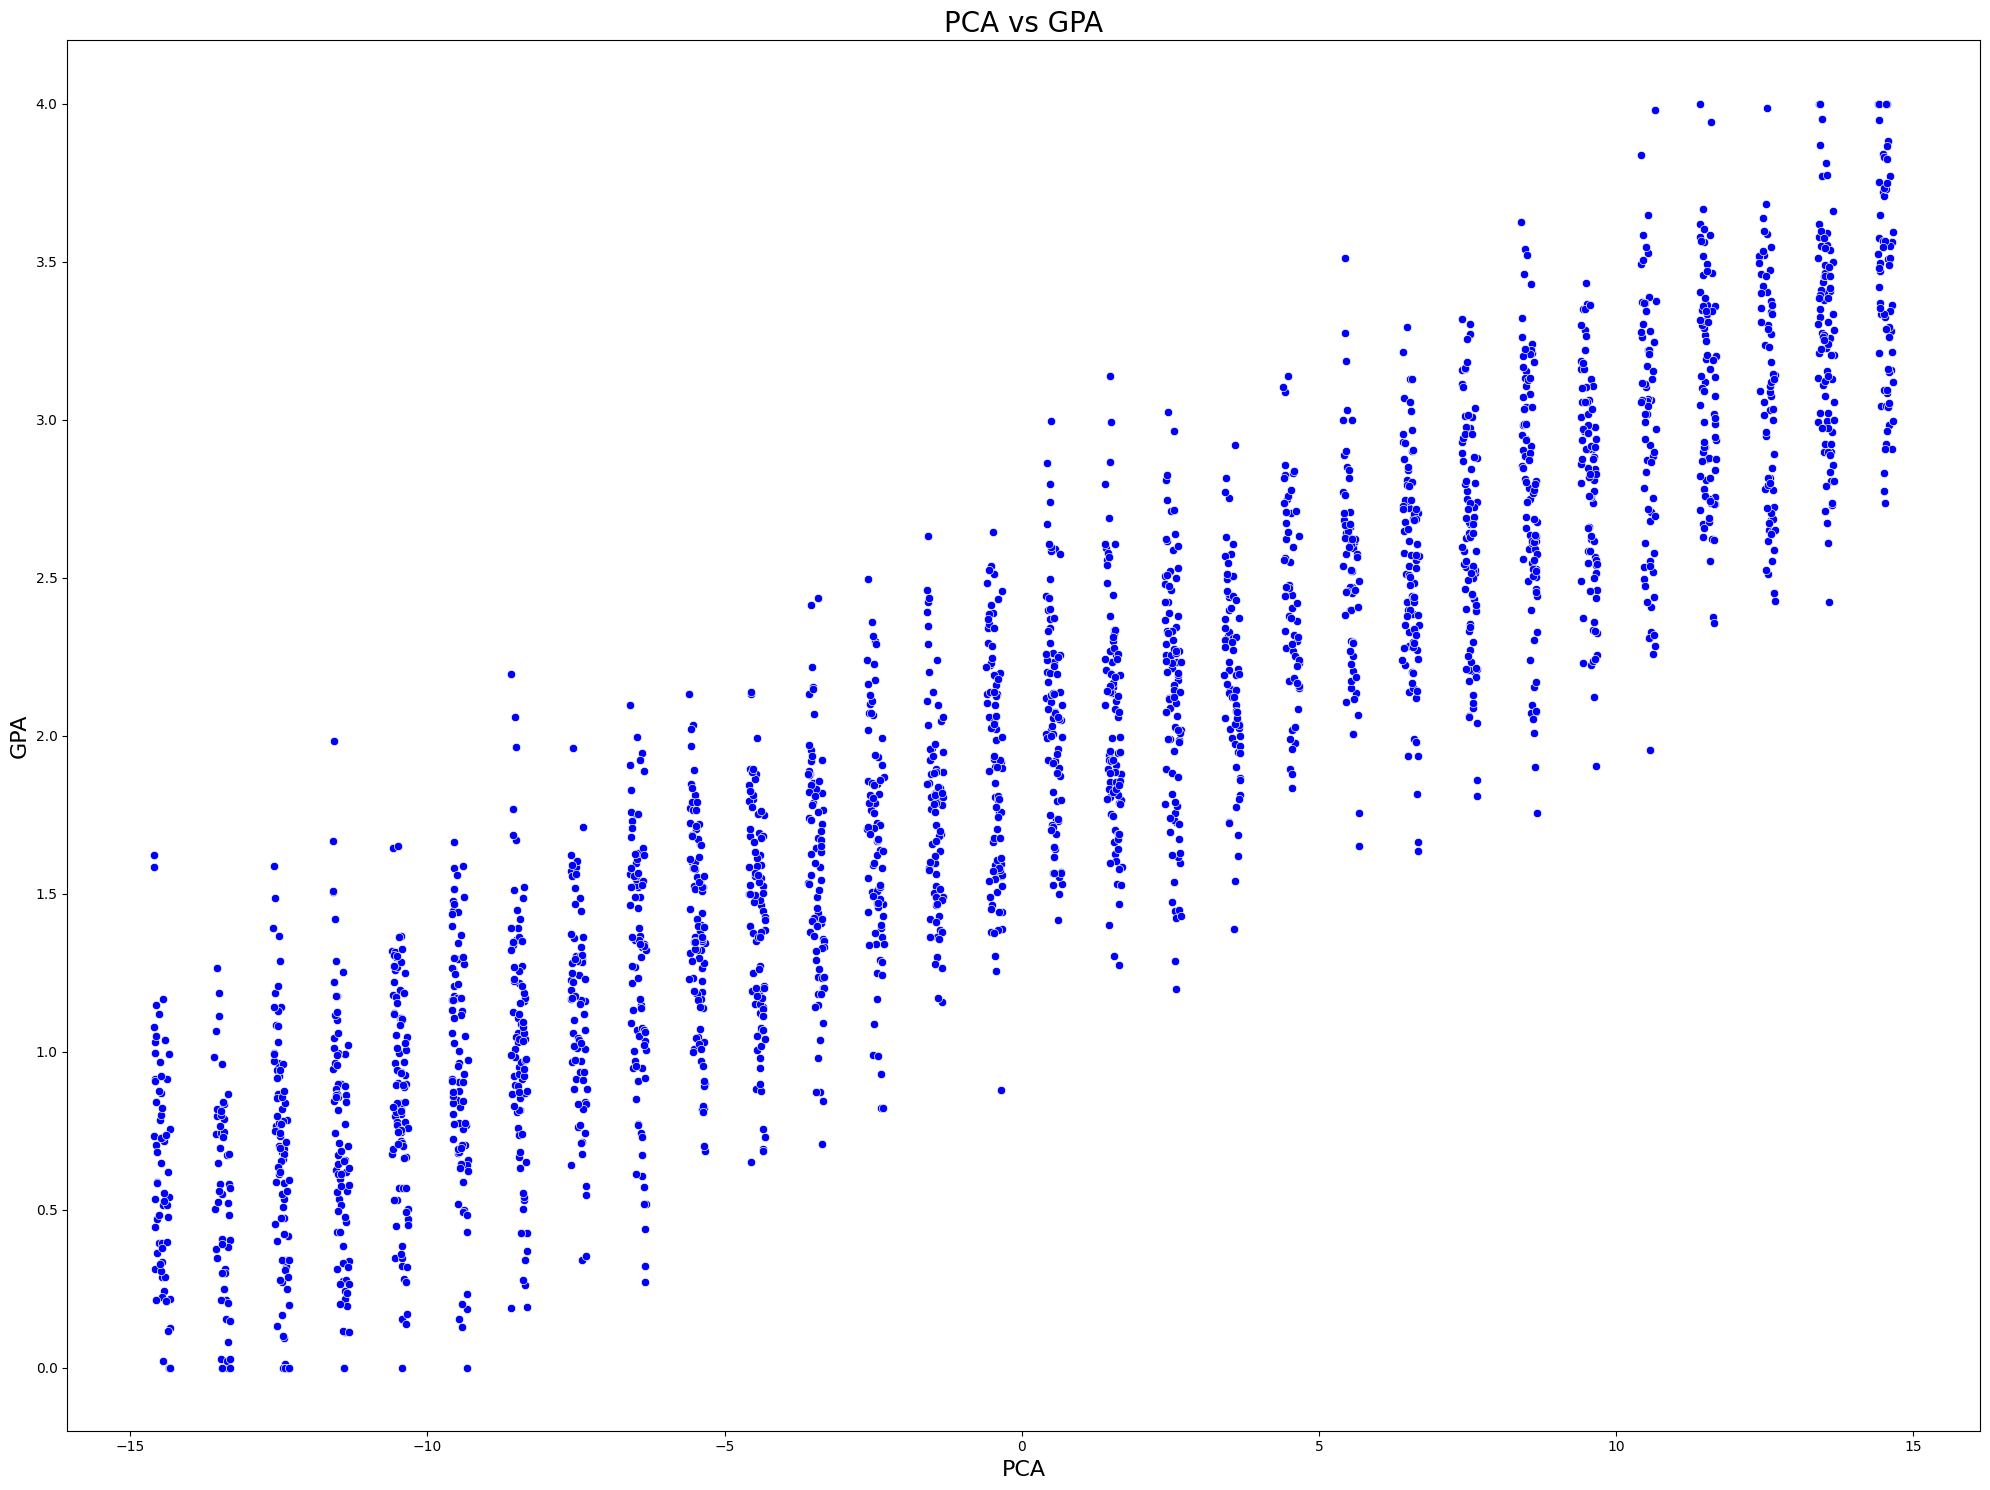

In [14]:
fig, axe = plt.subplots(figsize=(20, 15))

sns.scatterplot(x='PCA', y=target_col_name, data=data, ax=axe, color='b')
axe.set_title(f'PCA vs {target_col_name}', fontsize=20)
axe.set_xlabel('PCA', fontsize=16)
axe.set_ylabel(target_col_name, fontsize=16)

plt.tight_layout()
plt.show()

# Training

In [15]:
test_pairs = generate_random_pairs(data, 20000)
test_df = create_pair_df(data, test_pairs, target_col_name)

In [16]:
tree_depth = int(np.round(np.sqrt(len(data.columns))))

In [17]:
mf1 = train_evaluate_repeat(generate_random_pairs, data, num_samples=100000, depth=tree_depth, test_df=test_df, use_bradley=True, exp=True, add_noise=False, noise=0.1, label_col=target_col_name, repeats=1)

100%|██████████| 1/1 [02:36<00:00, 156.63s/it]

Mean Accuracy: 0.87645
Mean Precision: 0.874564112782704
Mean Recall: 0.8786786786786787
Mean F1 Score: 0.8766165676336944


In [18]:
var, residuals = calculate_pca_var(data, target_col_name)
print(var)

1.5236369554486304


In [25]:
# Calculating the number of pairs
max_pairs = len(data) * 10
alpha = 1e-6

num_pairs = int(max_pairs / (1 + alpha * var))
print(num_pairs)

23919


In [26]:
pretrain_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': tree_depth
}
pretrained_model = pretrain_model_with_residuals(df=data, n_samples=num_pairs, pretrain_params=pretrain_params, target_col=target_col_name, residuals=residuals)

In [ ]:
step = 50
num_samples = 800
repeats = 40

f1_scores_UB_repeats = []
f1_scores_UP_repeats = []
f1_scores_RB_repeats = []

# Create a for loop from n to num_samples with a step of n
for _ in range(repeats):
    f1_scores_UB, f1_scores_UP, f1_scores_RB = compare_three_methods(
        df=data,
        test_df=test_df,
        pretrain_params=pretrain_params,
        pretrained_model=pretrained_model,
        target_col=target_col_name,
        use_bradley=True,
        exp=True,
        add_noise=False,
        total_pairs=num_samples,
        batch_size=step,
    )
    f1_scores_UB_repeats.append(f1_scores_UB)
    f1_scores_UP_repeats.append(f1_scores_UP)
    f1_scores_RB_repeats.append(f1_scores_RB)

save_f1_scores("./student_f1_repeat.pkl", f1_scores_UB_repeats, f1_scores_UP_repeats, f1_scores_RB_repeats)
# Compute the average F1 scores across repeats
average_f1_scores_UB = np.mean(f1_scores_UB_repeats, axis=0)
average_f1_scores_UP = np.mean(f1_scores_UP_repeats, axis=0)
average_f1_scores_RB = np.mean(f1_scores_RB_repeats, axis=0)

Blank model with random pairs: 100%|██████████| 16/16 [00:06<00:00,  2.48it/s]


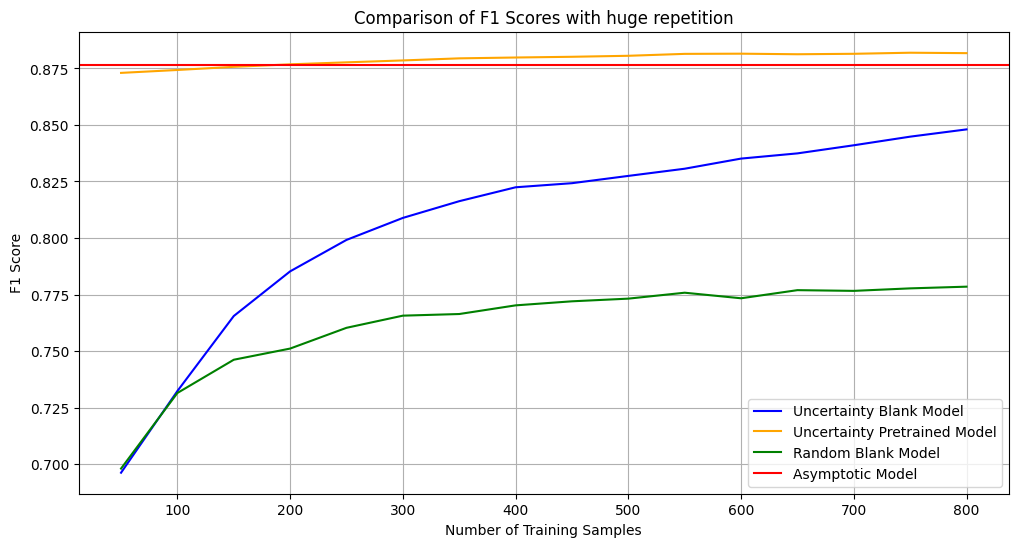

In [28]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(range(step, num_samples+1, step), average_f1_scores_UB, label='Uncertainty Blank Model', color='blue')
plt.plot(range(step, num_samples+1, step), average_f1_scores_UP, label='Uncertainty Pretrained Model', color='orange')
plt.plot(range(step, num_samples+1, step), average_f1_scores_RB, label='Random Blank Model', color='green')
plt.axhline(y = mf1, color = 'r', linestyle = '-', label='Asymptotic Model')
plt.xlabel('Number of Training Samples')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores with huge repetition')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
step = 50
num_samples = 10000
repeats = 1

f1_scores_UB_repeats2 = []
f1_scores_UP_repeats2 = []
f1_scores_RB_repeats2 = []

# Create a for loop from n to num_samples with a step of n
for _ in range(repeats):
    f1_scores_UB, f1_scores_UP, f1_scores_RB = compare_three_methods(
        df=data,
        test_df=test_df,
        pretrain_params=pretrain_params,
        pretrained_model=pretrained_model,
        target_col=target_col_name,
        use_bradley=True,
        exp=True,
        add_noise=False,
        total_pairs=num_samples,
        batch_size=step,
    )
    f1_scores_UB_repeats2.append(f1_scores_UB)
    f1_scores_UP_repeats2.append(f1_scores_UP)
    f1_scores_RB_repeats2.append(f1_scores_RB)

save_f1_scores("./student_f1_wide.pkl", f1_scores_UB_repeats2, f1_scores_UP_repeats2, f1_scores_RB_repeats2)
# Compute the average F1 scores across repeats
average_f1_scores_UB2 = np.mean(f1_scores_UB_repeats2, axis=0)
average_f1_scores_UP2 = np.mean(f1_scores_UP_repeats2, axis=0)
average_f1_scores_RB2 = np.mean(f1_scores_RB_repeats2, axis=0)

Blank model with random pairs: 100%|██████████| 200/200 [02:55<00:00,  1.14it/s]


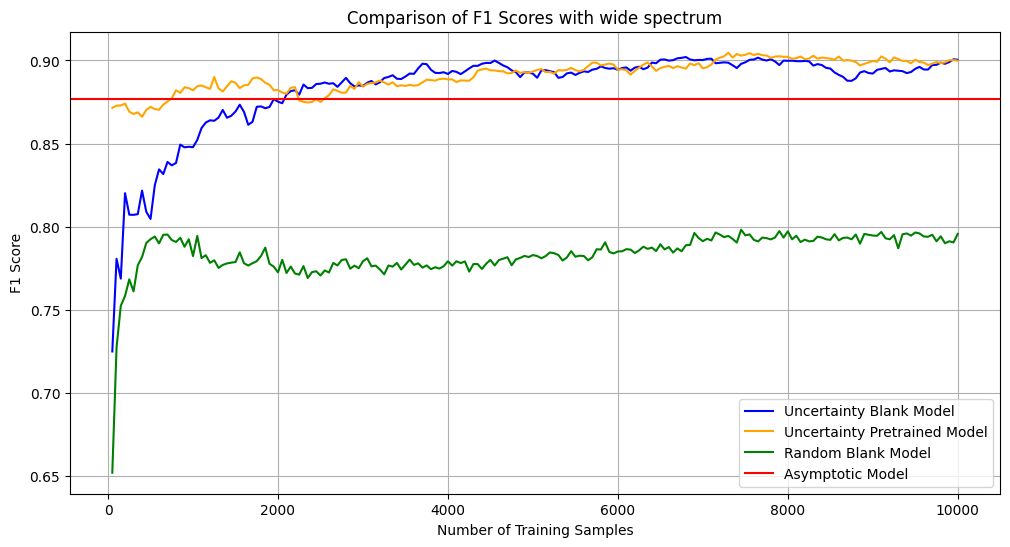

In [30]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(range(step, num_samples+1, step), average_f1_scores_UB2, label='Uncertainty Blank Model', color='blue')
plt.plot(range(step, num_samples+1, step), average_f1_scores_UP2, label='Uncertainty Pretrained Model', color='orange')
plt.plot(range(step, num_samples+1, step), average_f1_scores_RB2, label='Random Blank Model', color='green')
plt.axhline(y = mf1, color = 'r', linestyle = '-', label='Asymptotic Model')
plt.xlabel('Number of Training Samples')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores with wide spectrum')
plt.legend()
plt.grid(True)
plt.show()